#  Singlet doublet fermion dark matter model

We expect here degenerate masses so we must be carefull about the DM particles that is registered by micrOMEGAS:

We need to edit prtcls1.mld to have the righ order with Nv0 appearing first

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *

T13A-Feynrules
https://fisica.udea.edu.co:4443/user/restrepo/notebooks/prog/2016/micromegas_feynrules/correr_micrOMEGAs-markov.ipynb


## Check one point

In [ ]:
#1. CHOOSE A BENCHMARK POINT  
#if 1==1:
#    MDF = 110.;MN = 101.;tanb = 10.0;lam = 0.15;v=246.2196; 
def run_point(MDF = 110.,MN = 101.,tanb = 10.0,lam = 0.15,v=246.2196,path='../micromegas/SDFDM/main'):
    o={}
    #2. File to run micrOMEGAS installed in galcen
    f1 = open("input.par","w") 

    lu=lam*np.sin(np.arctan(tanb))
    ld=lam*np.cos(np.arctan(tanb))
    

    M=np.matrix([[ MN,                -ld*v/np.sqrt(2.),  lu*v/np.sqrt(2.)],
             [ -ld*v/np.sqrt(2.),  0.,                MDF ],
             [ lu*v/np.sqrt(2.),  MDF,               0. ]])

    (Mchi,N)=np.linalg.eig(M)

    f1.write('MDF'+'\t'+str(MDF)+'\n'+'MN'+'\t'+str(MN)+'\n'+'ld'+'\t'+str(ld)+'\n'+'lu'+'\t'+str(lu)+'\n'\
        +'N11'+'\t'+str(N[0,0])+'\n'+'N12'+'\t'+str(N[0,1])+'\n'+'N13'+'\t'+str(N[0,2])+'\n'\
        +'N21'+'\t'+str(N[1,0])+'\n'+'N22'+'\t'+str(N[1,1])+'\n'+'N23'+'\t'+str(N[1,2])+'\n'\
        +'N31'+'\t'+str(N[2,0])+'\n'+'N32'+'\t'+str(N[2,1])+'\n'+'N33'+'\t'+str(N[2,2])+'\n')
    #Close file
    f1.close()     

    #3. Run micromegas
    mo=commands.getoutput('%s input.par' %path)

    #4. Extrac some of the output (Dependence of the micrOMEGAs vertion)
    o['Full']=mo
    o['Mchi']=Mchi
    o['N']=N
    o['Omega']=eval(mo.split('Omega=')[1].split('\n')[0])
    o['SI']=eval(mo.split('proton  SI')[1].split('[')[0])
    o['SD']=eval(mo.split('proton  SI')[1].split('SD')[1].split('[')[0])
    o['sigmav']=eval(mo.split('annihilation cross section')[1].split('cm^3/s\n')[0])
    return o

In [4]:
a=hep(MODEL='SimplifiedDMDFDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [25]:
v=a.vev
#lambda_1=0.13
mdf=1100
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDFINPUT' %mdf
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI

Omega h^2, SI proton, neutron = 0.114 0.0001702 0.007421


In [6]:
v=a.vev
#lambda_1=0.13
mdf=1100
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDFINPUT' %mdf
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI

Omega h^2, SI proton, neutron = 0.114 0.0001702 0.007421


## Scan $m_{DM}$

In [8]:
df=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
dm_masses=np.linspace(100,1200,100)
for MDM in dm_masses:
    if np.where(dm_masses==MDM)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDM)[0][0]
    a.LHA.blocks['MINPAR'][2]='%0.8E       #MDFINPYT' %MDM
    a.runmicromegas(Direct_Detection=True)
    a.Series=a.Series.append(pd.Series({'MDF':MDM}))
    df=df.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


### Relic density

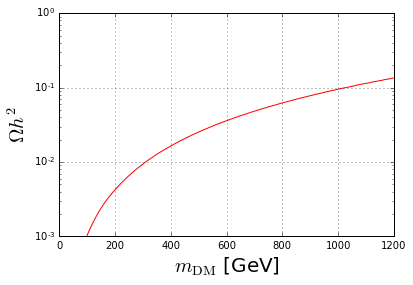

In [17]:
plt.semilogy(df.MDF,df.Omega_h2,'r-')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.savefig('omega.pdf')


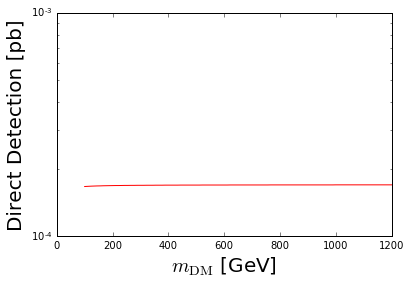

In [18]:
plt.semilogy(df.MDF,df.proton_SI,'r-')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.savefig('dd.pdf')

[Jupyter home](./draft.pdf)